# Parameters tuning

Kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane. We'll focus on the two last ones in this section.

Let's now carry on with a bigger dataset and try with different values of the parameters and try normalization.


In [10]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer

gt = pd.read_csv('../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

### Kernel

In [11]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel:
    svc = SVC(kernel=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.992
Accuracy on training set: 0.998
Accuracy on test set: 0.994
Accuracy on training set: 0.998
Accuracy on test set: 0.996
Accuracy on training set: 0.949
Accuracy on test set: 0.941


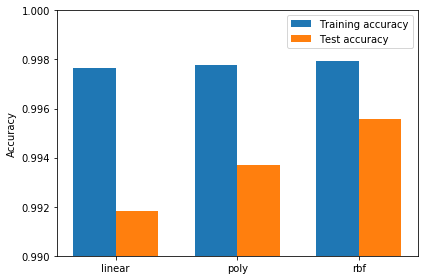

In [16]:
training_accuracy = [] 
test_accuracy = []
kernel = ['linear', 'poly', 'rbf']
for i in kernel:
    svc = SVC(kernel=i)
    svc.fit(data_train, target_train)
    training_accuracy.append(svc.score(data_train, target_train))
    test_accuracy.append(svc.score(data_test, target_test))
    
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(kernel))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training accuracy')
rects2 = ax.bar(x + width/2, test_accuracy, width, label='Test accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(kernel)
ax.legend()


bottom, top = plt.ylim()
plt.ylim(bottom=0.99)
plt.ylim(top=1)

fig.tight_layout()

plt.show()

## Gamma

The *gamma* parameter controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The higher the gamma value it tries to exactly fit the training data set.

In [3]:
gammas = [0.1, 1, 10, 100]
for i in gammas:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', gamma=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.999
Accuracy on test set: 0.985
min_samples_split set to 1
Accuracy on training set: 0.999
Accuracy on test set: 0.977
min_samples_split set to 10
Accuracy on training set: 0.999
Accuracy on test set: 0.970
min_samples_split set to 100
Accuracy on training set: 0.999
Accuracy on test set: 0.968


Looks like we get better results with a gamma value of 100.

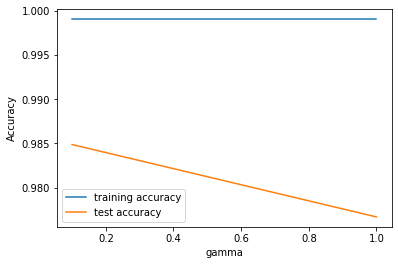

In [4]:
training_accuracy = [] 
test_accuracy = []
gammas = [0.1, 1]
for v in gammas:
    clf = SVC(kernel='rbf', gamma=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(gammas, training_accuracy, label="training accuracy") 
plt.plot(gammas, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

In [8]:
gammas = ['scale','auto']
for i in gammas:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', gamma=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to scale
Accuracy on training set: 0.998
Accuracy on test set: 0.996
min_samples_split set to auto
Accuracy on training set: 0.998
Accuracy on test set: 0.996


## C

The *C* parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point.

In [5]:
c_values = [0.1, 1, 10, 100, 1000]
for i in c_values:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', C=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.986
Accuracy on test set: 0.988
min_samples_split set to 1
Accuracy on training set: 0.998
Accuracy on test set: 0.996
min_samples_split set to 10
Accuracy on training set: 0.999
Accuracy on test set: 0.996
min_samples_split set to 100
Accuracy on training set: 0.999
Accuracy on test set: 0.996
min_samples_split set to 1000
Accuracy on training set: 0.999
Accuracy on test set: 0.996


Better results are acquired with higher C values for both sets.

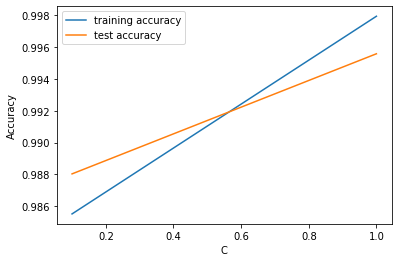

In [6]:
training_accuracy = [] 
test_accuracy = []
c_values = [0.1, 1]
for v in c_values:
    clf = SVC(kernel='rbf', C=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(c_values, training_accuracy, label="training accuracy") 
plt.plot(c_values, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

## Degree

*degree* is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

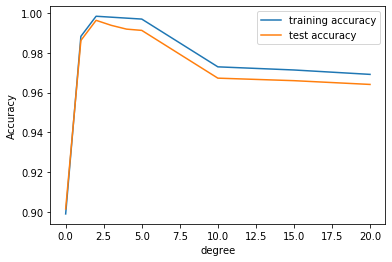

In [7]:
training_accuracy = [] 
test_accuracy = []
degrees = [0, 1, 2, 3, 4, 5, 10, 15, 20]
for v in degrees:
    clf = SVC(kernel='poly', degree=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(degrees, training_accuracy, label="training accuracy") 
plt.plot(degrees, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("degree")
plt.legend()

As we can see, the more we increase the degree the more we get a better training set accuracy. We might be overfitting at some point and therefore keep a reasonable value around *degree=15* max. One also has to know that higher degree means higher computing times.

### Final choice

In [15]:
clf = SVC(random_state=0)
clf.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(clf.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(clf.score(data_test, target_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.996


In [13]:
clf = SVC()
clf.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(clf.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(clf.score(data_test, target_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.996
